In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
con = sqlite3.connect('/content/northwind_small.sqlite')

str_query = ('SELECT e.FirstName, od.OrderId, od.Quantity, od.UnitPrice, od.Discount '
            'FROM Employee e '
            'JOIN [Order] o ON e.Id = o.EmployeeId '
            'JOIN OrderDetail od ON od.OrderId = o.Id'
            )

In [4]:
df = pd.read_sql_query(str_query, con)

df

,FirstName,OrderId,Quantity,UnitPrice,Discount
0,Steven,10248,12,14.00,0.00
1,Steven,10248,10,9.80,0.00
2,Steven,10248,5,34.80,0.00
3,Michael,10249,9,18.60,0.00
4,Michael,10249,40,42.40,0.00
...,...,...,...,...,...
2150,Nancy,11077,2,33.25,0.03
2151,Nancy,11077,1,17.00,0.00
2152,Nancy,11077,2,15.00,0.01
2153,Nancy,11077,4,7.75,0.00


In [5]:
df['price_per_order'] = df.Quantity * df.UnitPrice * (1 - df.Discount)
df.drop(['Quantity', 'UnitPrice', 'Discount'], axis=1, inplace=True)
df = df.groupby(['FirstName', 'OrderId'])['price_per_order'].sum().reset_index()
df.drop('OrderId', axis=1, inplace=True)

df.head()

,FirstName,price_per_order
0,Andrew,1176.0
1,Andrew,1200.8
2,Andrew,613.2
3,Andrew,121.6
4,Andrew,608.0


In [6]:
total_sell = df['price_per_order'].sum()
df_sum = df[['FirstName', 'price_per_order']].groupby(['FirstName']).sum().reset_index()
df_sum['Percentual'] = df_sum['price_per_order']/total_sell*100
print(total_sell)

df_sum


1265793.0395


,FirstName,price_per_order,Percentual
0,Andrew,166537.7550,13.156792
1,Anne,77308.0665,6.107481
2,Janet,202812.8430,16.022591
3,Laura,126862.2775,10.022355
4,Margaret,232890.8460,18.398809
5,Michael,73913.1295,5.839274
6,Nancy,192107.6045,15.176857
7,Robert,124568.2350,9.841122
8,Steven,68792.2825,5.434718


In [10]:
total_pedidos = df['price_per_order'].count()
df_count = df[['FirstName', 'price_per_order']].groupby(['FirstName']).count().reset_index()
df_count['Percentual'] = df_count['price_per_order']/df.shape[0]*100
print(df.shape[0])

df_count.columns = ['Vendedor(a)', 'Ordens Emitidas', 'Percentual']
df_count

830


,Vendedor(a),Ordens Emitidas,Percentual
0,Andrew,96,11.566265
1,Anne,43,5.180723
2,Janet,127,15.301205
3,Laura,104,12.530120
4,Margaret,156,18.795181
5,Michael,67,8.072289
6,Nancy,123,14.819277
7,Robert,72,8.674699
8,Steven,42,5.060241


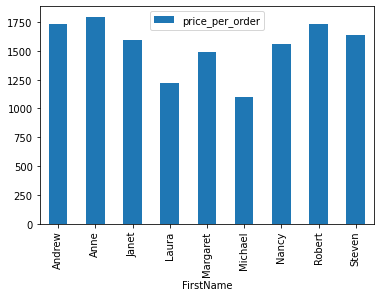

In [11]:
df[['FirstName', 'price_per_order']].groupby(['FirstName']).mean().plot(kind='bar')

Text(0.5, 1.0, 'Percentual de vendas por vendedor relacionado ao faturamento total')

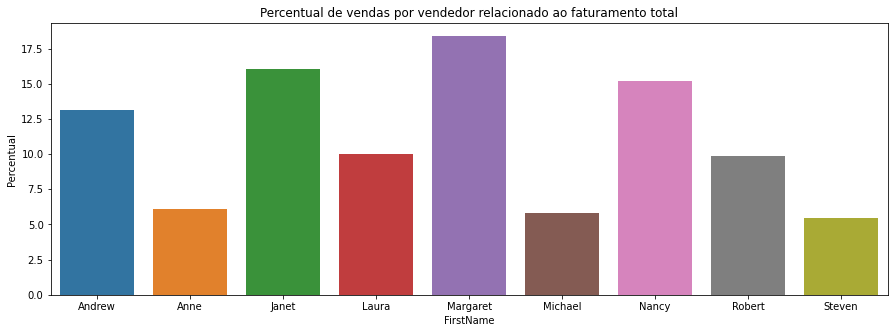

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='FirstName', y='Percentual', data=df_sum).set_title('Percentual de vendas por vendedor relacionado ao faturamento total')

Text(0.5, 1.0, 'Percentual de vendas por vendedor relacionada a quantidade de ordens emitidas')

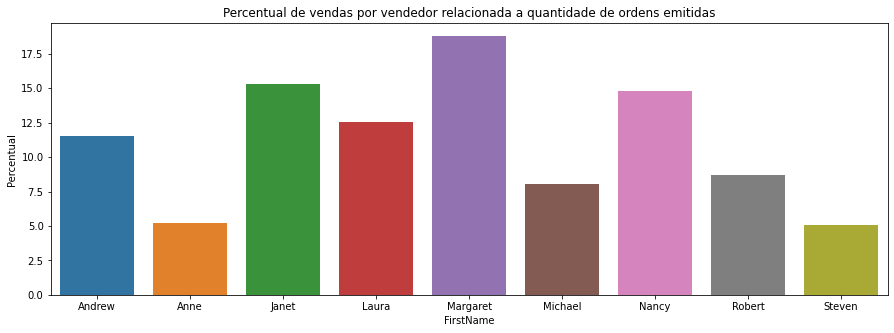

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='FirstName', y='Percentual', data=df_count).set_title('Percentual de vendas por vendedor relacionada a quantidade de ordens emitidas')

In [ ]:
def percent_calc(df_aux, max):
  list = df_aux.sort_values(by='Percentual', ascending=False)['Percentual']
  count = 0 
  sum = 0
  for i in list:
    count = count+1 
    if (sum <= max) :
      sum = i+sum
    else:
      break
  return round(sum, 2), round(count/df_aux.shape[0]*100) 


#Insights


In [ ]:
per_sell_janet_jargaret = df_sum['Percentual'][(df_sum['FirstName'] == 'Janet') | (df_sum['FirstName'] == 'Margaret')].sum()
print('Percentual vendido por 20% dos vendedores: ', round(per_sell_janet_jargaret, 2))

per_count_sell_janet_jargaret = df_count['Percentual'][(df_count['FirstName'] == 'Janet') | (df_count['FirstName'] == 'Margaret')].sum()
print('Percentual de ordens geradas por 20% dos vendedores: ', round(per_count_sell_janet_jargaret, 2))

Percentual vendido por 20% dos vendedores:  34.42
Percentual de ordens geradas por 20% dos vendedores:  34.1


Com *20%* dos funcionários fatura *34,1%* das ordens, o que representa *34,42%* do total faturado;

In [ ]:
sum, percent_sellers = percent_calc(df_count, 80)
print('{}% dos pedidos é faturado por {}% dos funcionários'.format(sum, percent_sellers))

81.69% dos pedidos é faturado por 78% dos funcionários


81.69% dos pedidos é faturado por 78% dos funcionários

In [ ]:
sum, percent_sellers = percent_calc(df_sum, 60)
print('{}% da receita da empresa é obtida por {}% dos vendedores'.format(sum, percent_sellers))

62.76% da receita da empresa é obtida por 56% dos vendedores


62.76% da receita da empresa é obtida por 56% dos vendedores

As colaboradoras Margaret e Janet são as vendedoras que mais contribuem com o total faturado pela empresa, já os vendedores com a menor quantidade de ordens emitidas, Steven e Anne, estão entre os 4 maiores preços preços médios por venda, o que indica que caso eles consigam vender mais o faturamento será fortemente afetado.  